In [1]:
#학습용, 검증용 분리
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train[:5])

[5 0 4 1 9]


In [2]:
#원핫인코딩
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
print(y_train[:5])
y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
#정규화
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, W*H)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
#분류 DNN 모델 구현 함수
from keras.layers import Dense, Dropout
from keras.models import Sequential
def make_model(input_number, layers, output_number):
    # 모델 초기화
    model = Sequential()
    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,)))
    model.add(Dense(layers[1], activation='relu'))
    model.add(Dense(layers[2], activation='relu'))
    # 드롭아웃
    model.add(Dropout(0.2))
    # 출력층
    model.add(Dense(output_number, activation='softmax', name='output'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
#모델 생성
input_number = 784 # 28x28
hidden_layers = [1428, 64, 32] # 은닉층
number_of_class = 10
output_number = number_of_class
model = make_model(input_number, hidden_layers, output_number)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1428)              1120980   
                                                                 
 dense_1 (Dense)             (None, 64)                91456     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 1,214,846
Trainable params: 1,214,846
Non-trainable params: 0
_________________________________________________________________


In [6]:
#모델 학습
hist = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.3786 - accuracy: 0.8886 - val_loss: 0.1308 - val_accuracy: 0.9616
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1342 - accuracy: 0.9626 - val_loss: 0.0980 - val_accuracy: 0.9710
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9752 - val_loss: 0.0905 - val_accuracy: 0.9712
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0616 - accuracy: 0.9819 - val_loss: 0.0901 - val_accuracy: 0.9744
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0486 - accuracy: 0.9859 - val_loss: 0.0935 - val_accuracy: 0.9747


In [7]:
#모델 평가
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9774


[0.08152032643556595, 0.977400004863739]

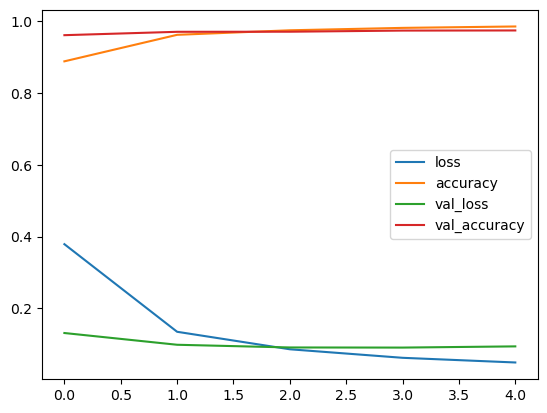

In [8]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show()